In [15]:
# 📁 Week 1 – Greenhouse Gas Emission Prediction

# ✅ Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')  # Stylish grid background
sns.set_palette('crest')  # Clean seaborn theme

print("✅ Libraries imported successfully.")


✅ Libraries imported successfully.


In [16]:
# 📥 Step 2: Load the Dataset
df = pd.read_csv("SupplyChainEmission.csv")

# Preview
print("✅ Dataset loaded. Shape:", df.shape)
df.head()


✅ Dataset loaded. Shape: (264, 13)


,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",Supply Chain Emission Factors without Margins,0.041,0.465,NaN,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.000,0.023,NaN,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.184,0.017,0.201,NaN,4,2,1,4,1


In [17]:
# 🧾 Step 3: View All Column Names
for col in df.columns:
    print(f'"{col}"')


"Industry Code"
"Industry Name"
"Substance"
"Unit"
"Supply Chain Emission Factors without Margins"
"Margins of Supply Chain Emission Factors"
"Supply Chain Emission Factors with Margins"
"Unnamed: 7"
"DQ ReliabilityScore of Factors without Margins"
"DQ TemporalCorrelation of Factors without Margins"
"DQ GeographicalCorrelation of Factors without Margins"
"DQ TechnologicalCorrelation of Factors without Margins"
"DQ DataCollection of Factors without Margins"


In [18]:
# 🧹 Step 4: Handle Missing Values (Only Target Column)

# Keep rows that have emission values
df = df.dropna(subset=["Supply Chain Emission Factors with Margins"])

# Drop duplicates if any
df = df.drop_duplicates()

print("✅ After cleaning, shape:", df.shape)


✅ After cleaning, shape: (264, 13)


C:\Users\polis\AppData\Local\Temp\ipykernel_13620\456070396.py:11: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\polis\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


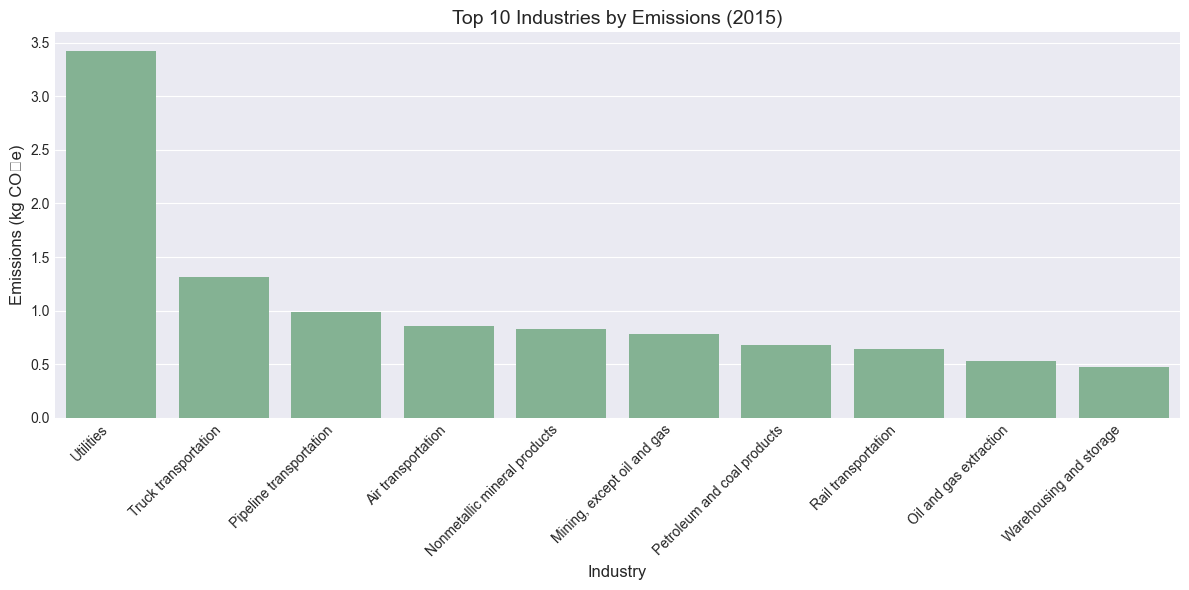

In [19]:
# 🔥 Step 5.1: Top 10 Industries by Emissions

top_10 = df.sort_values(by="Supply Chain Emission Factors with Margins", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_10, x='Industry Name', y='Supply Chain Emission Factors with Margins')
plt.title('Top 10 Industries by Emissions (2015)', fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Emissions (kg CO₂e)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\polis\AppData\Local\Temp\ipykernel_13620\2049724684.py:8: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\polis\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


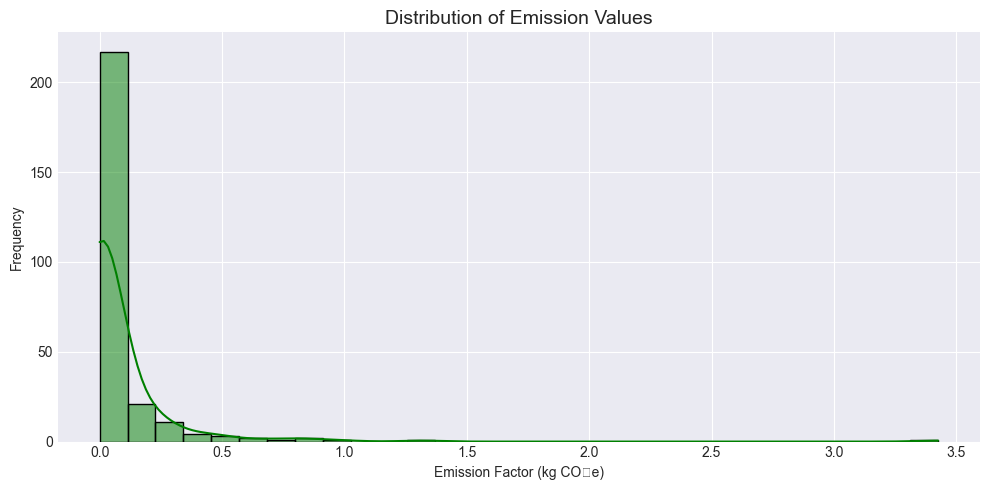

In [20]:
# 📈 Step 5.2: Emission Distribution Across Industries

plt.figure(figsize=(10,5))
sns.histplot(df["Supply Chain Emission Factors with Margins"], bins=30, kde=True, color='green')
plt.title("Distribution of Emission Values", fontsize=14)
plt.xlabel("Emission Factor (kg CO₂e)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


## Week 1 Summary

- Dataset: U.S. industry-wise supply chain emission factors (2015).
- Cleaning: Removed rows with missing values in the emission column.
- Insights:
  - Bar chart showing the top 10 industries by emission.
  - Histogram showing the distribution of emission values.
- Tools Used: Python, Pandas, Seaborn, Matplotlib.
- Outcome: Dataset cleaned, visualized, and ready for model building in Week 2.


In [1]:
# STEP 1 – IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib  # for saving model

# Style for plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('mako')

print("✅ Libraries imported.")


✅ Libraries imported.


In [2]:
# STEP 2 – LOAD DATA
df = pd.read_csv("SupplyChainEmission.csv")  # Make sure CSV is in the same folder

print("✅ Dataset loaded. Shape:", df.shape)
df.head()


✅ Dataset loaded. Shape: (264, 13)


,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",Supply Chain Emission Factors without Margins,0.041,0.465,NaN,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.000,0.023,NaN,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.184,0.017,0.201,NaN,4,2,1,4,1


In [3]:
# STEP 3 – CLEAN DATA

# Remove rows with missing target
df = df.dropna(subset=['Supply Chain Emission Factors with Margins'])

# Remove duplicates
df = df.drop_duplicates()

# Reset index
df = df.reset_index(drop=True)

print("✅ Cleaned dataset shape:", df.shape)
print("🧼 Nulls in other columns:\n", df.isnull().sum())


✅ Cleaned dataset shape: (264, 13)
🧼 Nulls in other columns:
 Industry Code                                               0
Industry Name                                               0
Substance                                                   0
Unit                                                        0
Supply Chain Emission Factors without Margins               0
Margins of Supply Chain Emission Factors                    0
Supply Chain Emission Factors with Margins                  0
Unnamed: 7                                                264
DQ ReliabilityScore of Factors without Margins              0
DQ TemporalCorrelation of Factors without Margins           0
DQ GeographicalCorrelation of Factors without Margins       0
DQ TechnologicalCorrelation of Factors without Margins      0
DQ DataCollection of Factors without Margins                0
dtype: int64


In [4]:
# STEP 4 – DEFINE FEATURES & TARGET

# Drop non-numeric columns and the target
X = df.drop(columns=['Industry Name', 'Supply Chain Emission Factors with Margins'])

# Keep only numeric features
X = X.select_dtypes(include=['number'])

# Fill missing values in features with 0
X = X.fillna(0)

# Define target variable
y = df['Supply Chain Emission Factors with Margins']

# Align target with features
y = y.loc[X.index]

print("✅ Features and target defined. X shape:", X.shape)


✅ Features and target defined. X shape: (264, 7)


In [5]:
# STEP 5 – SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data split complete.")
print("Train samples:", X_train.shape[0], " | Test samples:", X_test.shape[0])


✅ Data split complete.
Train samples: 211  | Test samples: 53


In [6]:
# STEP 6 – TRAIN REGRESSION MODELS

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"✅ {name} trained.")


✅ Linear Regression trained.
✅ Decision Tree trained.
✅ Random Forest trained.


In [7]:
# STEP 7 – EVALUATE MODELS

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'RMSE': round(rmse, 4),
        'MAE': round(mae, 4),
        'R² Score': round(r2, 4)
    })

results_df = pd.DataFrame(results)
results_df


,Model,RMSE,MAE,R² Score
0,Linear Regression,0.1572,0.0794,-0.1319
1,Decision Tree,0.1995,0.0860,-0.8233
2,Random Forest,0.1959,0.0850,-0.7587


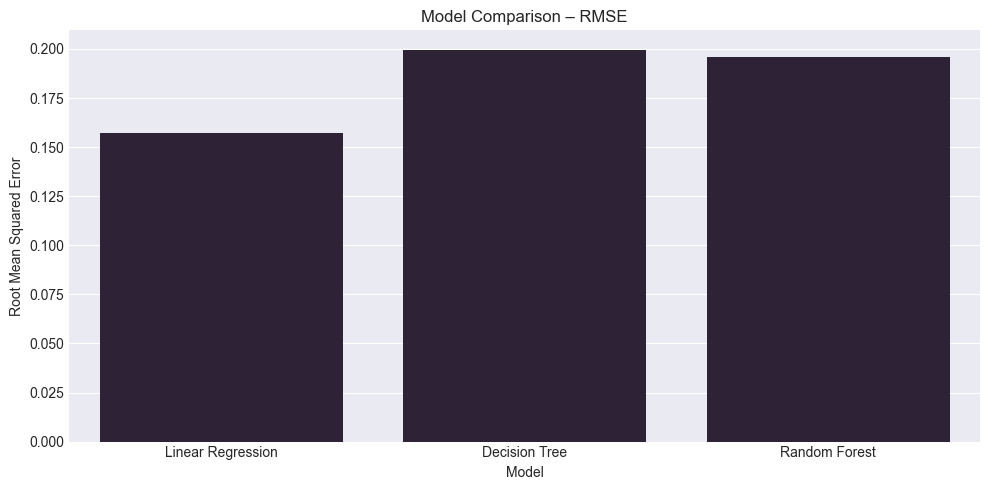

In [8]:
# STEP 8 – VISUALIZE RMSE

plt.figure(figsize=(10,5))
sns.barplot(data=results_df, x='Model', y='RMSE')
plt.title("Model Comparison – RMSE")
plt.ylabel("Root Mean Squared Error")
plt.xlabel("Model")
plt.tight_layout()
plt.show()


In [9]:
# STEP 9 – GRID SEARCH TUNING

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
print("✅ Best Params:", grid.best_params_)

# Evaluate tuned model
best_pred = best_rf.predict(X_test)
best_rmse = np.sqrt(mean_squared_error(y_test, best_pred))
print("📈 Tuned Random Forest RMSE:", round(best_rmse, 4))


✅ Best Params: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
📈 Tuned Random Forest RMSE: 0.1613


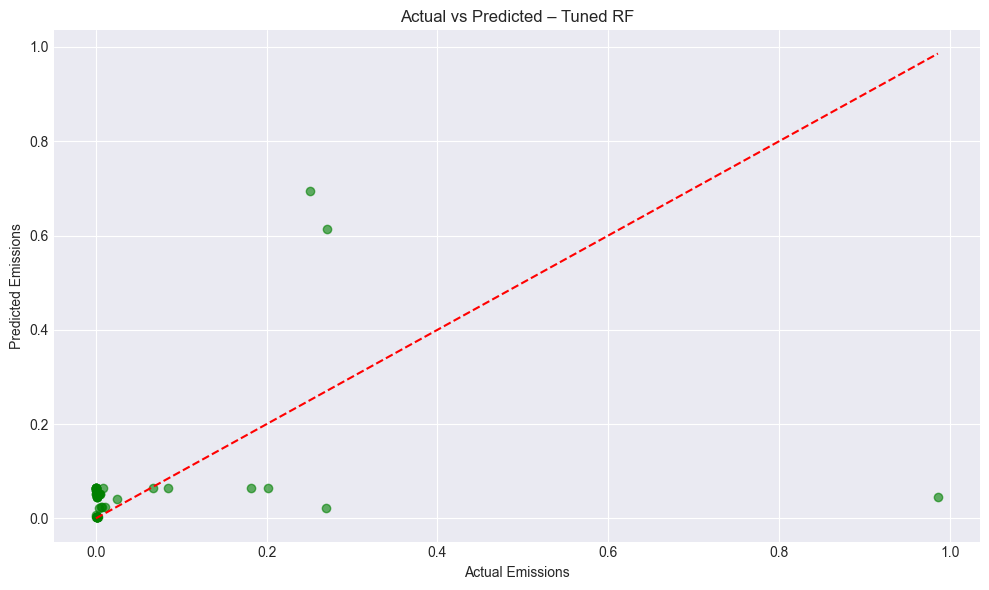

In [10]:
# STEP 10 – ACTUAL VS PREDICTED

plt.figure(figsize=(10,6))
plt.scatter(y_test, best_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Emissions")
plt.ylabel("Predicted Emissions")
plt.title("Actual vs Predicted – Tuned RF")
plt.tight_layout()
plt.show()


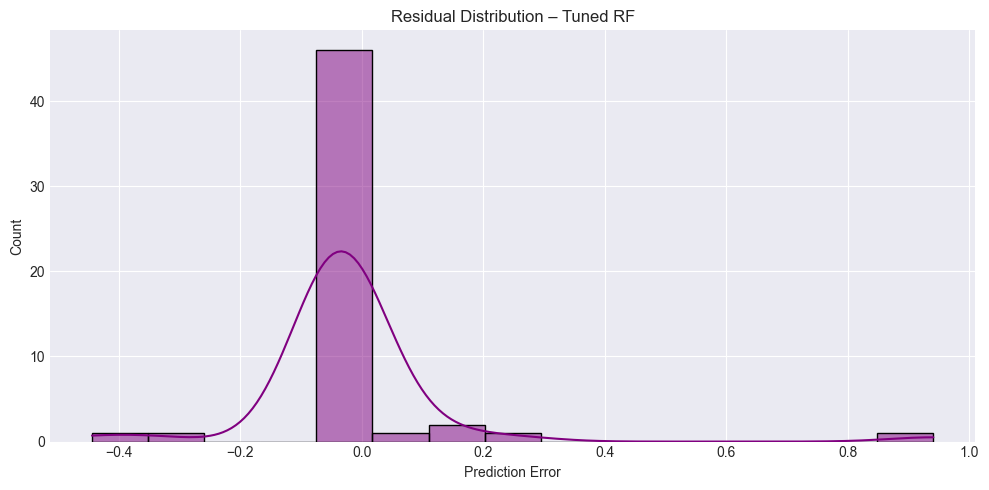

In [11]:
# STEP 11 – RESIDUAL PLOT

residuals = y_test - best_pred

plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residual Distribution – Tuned RF")
plt.xlabel("Prediction Error")
plt.tight_layout()
plt.show()


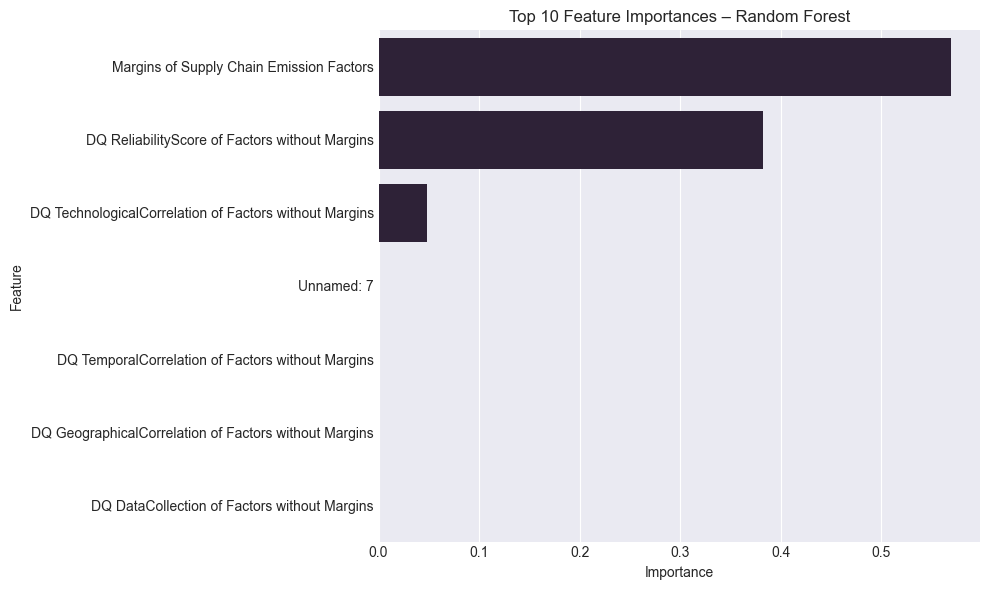

In [12]:
# STEP 12 – FEATURE IMPORTANCE

importances = best_rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title("Top 10 Feature Importances – Random Forest")
plt.tight_layout()
plt.show()


In [13]:
# STEP 13 – SAVE FINAL MODEL
joblib.dump(best_rf, "best_random_forest_model.pkl")
print("✅ Model saved as best_random_forest_model.pkl")


✅ Model saved as best_random_forest_model.pkl


## ✅ Week 2 Summary

- Cleaned dataset and selected numeric features
- Trained 3 models: Linear Regression, Decision Tree, Random Forest
- Evaluated using RMSE, MAE, and R²
- Tuned Random Forest using GridSearchCV
- Plotted Actual vs Predicted and Residuals
- Visualized Feature Importance
- Saved final model (.pkl)
- Notebook ready for submission
